In [293]:
# ----------------------------------------------------
# Licensed under the MIT License.
# Written by Aakash Agrawal (akash.gagrawal@gmail.com)
# ----------------------------------------------------

# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Configs
member = 'gompertz'
a0=0.87
a1=0.66
a2=0.55
lam=0.78

In [294]:
# helper functions
def G(t, lam):
    if member == 'weibull':
        return 1 - np.exp(-t ** lam)
    elif member == 'gompertz':
        return 1 - np.exp(-(np.exp(t * lam) - 1))
    else:
        return (t * lam / (1 + t * lam))
        
def g_dash(t, lam):
    if member == 'weibull':
        return lam * (t ** (lam - 1)) * np.exp(-t ** lam)
    elif member == 'gompertz':
        return lam * np.exp(1 + lam * t - np.exp(lam * t))
    else: 
        return lam / (1 + t * lam) ** 2

def pdf(x, y):
    c1 = x - y
    a= a1 * (a0 + a2) * ((1 - G(x, lam)) ** (a1 - 1)) * ((1 - G(y, lam))**(a0 + a2 - 1)) * g_dash(x, lam) * g_dash(y, lam)
    b= a2 * (a0 + a1) * ((1 - G(y, lam)) ** (a2 - 1)) * ((1 - G(x, lam))**(a0 + a1 - 1)) * g_dash(x, lam) * g_dash(y, lam)
    return  np.where(c1 < 0, a, b)

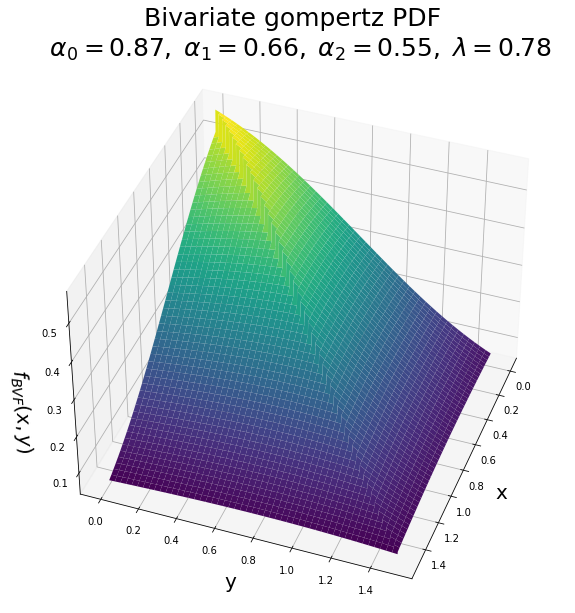

In [297]:
# data visualizations
x = np.linspace(0., 1.5, 1000)
y = np.linspace(0., 1.5, 1000)
X, Y = np.meshgrid(x,y)
Z = pdf(X,Y)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.get_cmap('viridis'))
ax.set_xlabel('x', fontsize=20, labelpad=10)
ax.set_ylabel('y', fontsize=20, labelpad=10)
ax.set_zlabel(r'$f_{BVF}(x, y)$', rotation=0, fontsize=20, labelpad=10)

info = rf'$\alpha_0 = {a0},\; \alpha_1 = {a1},\; \alpha_2 = {a2},\; \lambda = {lam}$' 
ax.set_title(f'Bivariate {member} PDF \n {info}', fontsize=25)
ax.view_init(30, 10)
plt.savefig(f"{member}.jpg")